# K-Means Clustering


<center>Resources</center>

https://en.wikipedia.org/wiki/Additive_smoothing

https://stats.stackexchange.com/questions/218492/how-does-naive-bayes-work-with-continuous-variables

http://lib.stat.cmu.edu/datasets/boston

P. Fränti and S. Sieranoja
K-means properties on six clustering benchmark datasets
Applied Intelligence, 48 (12), 4743-4759, December 2018
https://doi.org/10.1007/s10489-018-1238-7

https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf

In [196]:
import numpy as np

def lloyd_algo_1d(x, k, iters):
    lower_bound = np.min(x)
    upper_bound = np.max(x)
    
    k_means = []
    for i in range(k):
        k_means.append(lower_bound + np.random.rand()*(upper_bound-lower_bound))
    
    k_means_history = []
    k_means_history.append(np.array(k_means, copy = True))
    
    def variance(x, mean):
        return (x-mean)**2
    
    for count in range(iters):
        variances = []
        for mean in k_means:
            variances.append(variance(x, mean))
        variances = np.stack(variances, axis = 0)
        assignments = np.argmin(variances, axis = 0)
        
        for i in range(k):
            k_means[i] = np.mean(x[assignments == i])
        
        
        if count % 1000 == 0:
            #print(k_means)
            #print(assignments)
            #print(variances)
            pass
        k_means_history.append(np.array(k_means, copy = True))
        
    return k_means, assignments, k_means_history

[0.03765902679200351, 19.940985454486118, 40.0434996930102] [40.0434996930102, 0.03765902679200351, 19.940985454486118]


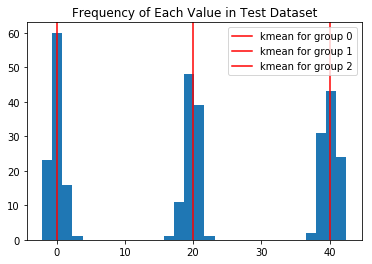

In [204]:
import matplotlib.pyplot as plt

k = 3
rand_dists = [np.random.randn(100)+i*20 for i in range(k)]
means = [np.mean(i) for i in rand_dists]
test_dataset = np.concatenate(rand_dists)

plt.hist(test_dataset, bins = 30, zorder = 2)
plt.title("Frequency of Each Value in Test Dataset")

k_means, assignments, k_means_history  =  lloyd_algo_1d(test_dataset, k, 10000)

print(means, k_means)

for i,mean in enumerate(k_means):
    plt.axvline(mean, c = 'r', label = f'kmean for group {i}')
    
plt.legend()
plt.show()

In [161]:
a3 = np.loadtxt(r'./datasets/Clustering - a3 (k =50).txt')

def lloyd_algo_2d(dataSet, k, iters):
    num_dim = dataSet.shape[1]
    
    lower_bounds = []
    upper_bounds = []
    for dim in range(num_dim):
        lower_bounds.append(np.min(dataSet[:, dim]))
        upper_bounds.append(np.max(dataSet[:, dim]))
    
    def random_assignments(lower_bounds, upper_bounds):
        k_mean = []
        for lower,upper in zip(lower_bounds, upper_bounds):
            k_mean.append(lower + np.random.rand()*(upper-lower))
        k_mean = np.array(k_mean)
        return k_mean
        
    k_means = []
    for i in range(k):
        k_means.append(random_assignments(lower_bounds, upper_bounds))
    
    init_k_means = np.array(k_means, copy = True)
    
    def variance(dataset, mean):
        return np.sum((dataSet - mean)**2, axis = 1)
    
    for count in range(iters):
        variances = []
        for mean in k_means:
            variances.append(variance(dataSet, mean))
        variances = np.stack(variances, axis = 0)
        assignments = np.argmin(variances, axis = 0)
        
        for i in range(k):
            if len(dataSet[assignments == i]) > 0:
                k_means[i] = np.mean(dataSet[assignments == i], axis = 0)
            else:
                k_means[i] = random_assignments(lower_bounds, upper_bounds)
        
    return k_means, assignments, init_k_means

k_means, assignments, init_k_means = lloyd_algo_2d(a3, 50, 1000)

k_means = np.array(k_means)
init_k_means = np.array(init_k_means)

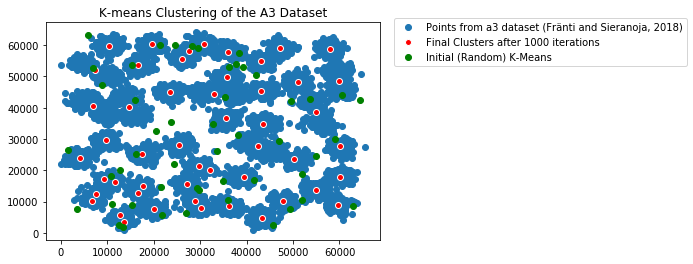

Text(0.5, 1.0, 'K-means Clustering of the A3 Dataset')

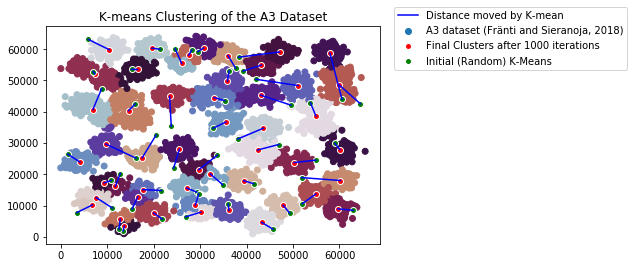

In [189]:
plt.scatter(a3[:, 0], a3[:, 1], label = 'Points from a3 dataset (Fränti and Sieranoja, 2018)')
plt.scatter(k_means[:,0], k_means[:, 1], c = 'r', edgecolor = 'w', label = 'Final Clusters after 1000 iterations')
plt.scatter(init_k_means[:, 0], init_k_means[:, 1], c = 'g', label = 'Initial (Random) K-Means')
plt.title('K-means Clustering of the A3 Dataset')
plt.legend(loc = (1.04, .8))
plt.show()

plt.scatter(a3[:, 0], a3[:, 1], c = assignments, cmap = 'twilight', label = 'A3 dataset (Fränti and Sieranoja, 2018)')
plt.scatter(k_means[:,0], k_means[:, 1], c = 'r', label = 'Final Clusters after 1000 iterations', edgecolor = 'w')
plt.scatter(init_k_means[:, 0], init_k_means[:, 1], c = 'g', edgecolor = 'w', label = 'Initial (Random) K-Means')
for i in range(len(k_means)):
    plt.plot([k_means[i, 0], init_k_means[i, 0]], [k_means[i, 1], init_k_means[i, 1]], c = 'b', label = 'Distance moved by K-mean')
    if i == 0:
        plt.legend(loc = (1.04, .8))
plt.title('K-means Clustering of the A3 Dataset')

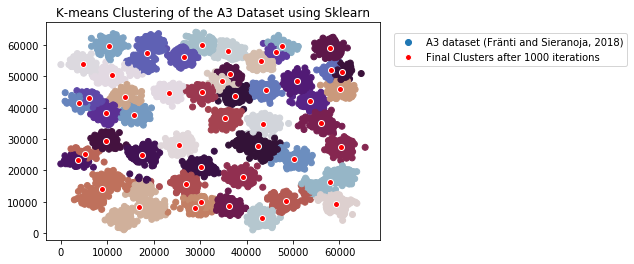

In [208]:
from sklearn.cluster import KMeans

# SKlearn's kmeans model includes additional features like kmeans++ initialization, repeated runs, precomputed distances, and convergence 
kmeans_model = KMeans(n_clusters = 50, init = 'random', n_init = 1, max_iter = 1000, tol = 10^-16, algorithm = 'full')
assignments_skl = kmeans_model.fit_predict(a3)

plt.scatter(a3[:, 0], a3[:, 1], c = assignments_skl, cmap = 'twilight', label = 'A3 dataset (Fränti and Sieranoja, 2018)')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:, 1], c = 'r', label = f'Final Clusters after {kmeans_model.n_iter_} iterations', edgecolor = 'w')
plt.title(f'K-means Clustering of the A3 Dataset using Sklearn')
plt.legend(loc = (1.04, .8))

In [227]:
# KMeans++ as implemented by Arthur and Vassilvitskii (2006)

import copy
rng = np.random.default_rng()

def variance(dataset, mean):
    return np.sum((dataset - mean)**2, axis = 1)

def random_assignments(lower_bounds, upper_bounds):
    k_mean = []
    for lower,upper in zip(lower_bounds, upper_bounds):
        k_mean.append(lower + np.random.rand()*(upper-lower))
    k_mean = np.array(k_mean)
    return k_mean

def kmeans_plus_plus(dataSet, k, np_rng, k_means_):
    k_means = copy.deepcopy(k_means_)
    indices = np.arange(len(dataSet))
    
    k_means.append(dataSet[np_rng.choice(indices)])
    
    for i in range(k-len(k_means)):
        variances = []
        for mean in k_means:
            variances.append(variance(dataSet, mean))
        variances = np.min(np.stack(variances), axis = 0)
        
        D_squared = variances/sum(variances)
        
        k_means.append(dataSet[np_rng.choice(indices, p = D_squared)])
    
    k_means = np.array(k_means)
    return (k_means)

k_means_init = kmeans_plus_plus(a3, 50, rng, [])

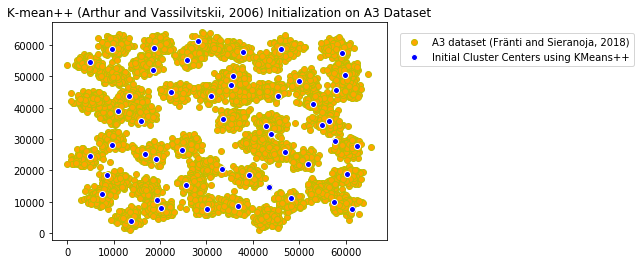

In [228]:
plt.scatter(a3[:, 0], a3[:, 1], c = 'orange', edgecolor = 'y', label = 'A3 dataset (Fränti and Sieranoja, 2018)')
plt.scatter(k_means_init[:,0], k_means_init[:, 1], c = 'b', label = f'Initial Cluster Centers using KMeans++', edgecolor = 'w')

plt.title(f'K-mean++ (Arthur and Vassilvitskii, 2006) Initialization on A3 Dataset')
plt.legend(loc = (1.04, .8))

In [229]:
def gen_lloyd_algo_2d(dataSet, k, iters, k_means_init, rng):
    num_dim = dataSet.shape[1]
    
    k_means = []
    k_means = k_means_init(dataSet, k, rng, k_means)
    
    init_k_means = np.array(k_means, copy = True)
    
    for count in range(iters):
        variances = []
        for mean in k_means:
            variances.append(variance(dataSet, mean))
        variances = np.stack(variances, axis = 0)
        assignments = np.argmin(variances, axis = 0)
        
        for i in range(k):
            if len(dataSet[assignments == i]) > 0:
                k_means[i] = np.mean(dataSet[assignments == i], axis = 0)
            else:
                k_means = k_means_init(dataSet, k, rng, k_means)
        
    return k_means, assignments, init_k_means

k_means, assignments, init_k_means = gen_lloyd_algo_2d(a3, 50, 1000, kmeans_plus_plus, rng)

Text(0.5, 1.0, 'K-means Clustering of the A3 Dataset using KMeans++ Initialization')

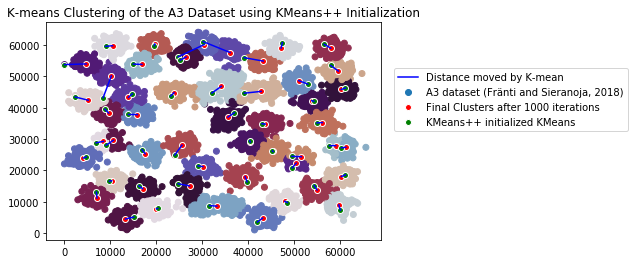

In [233]:
plt.scatter(a3[:, 0], a3[:, 1], c = assignments, cmap = 'twilight', label = 'A3 dataset (Fränti and Sieranoja, 2018)')
plt.scatter(k_means[:,0], k_means[:, 1], c = 'r', label = 'Final Clusters after 1000 iterations', edgecolor = 'w')
plt.scatter(init_k_means[:, 0], init_k_means[:, 1], c = 'g', edgecolor = 'w', label = 'KMeans++ initialized KMeans')
for i in range(len(k_means)):
    plt.plot([k_means[i, 0], init_k_means[i, 0]], [k_means[i, 1], init_k_means[i, 1]], c = 'b', label = 'Distance moved by K-mean')
    if i == 0:
        plt.legend(loc = (1.04, .5))
plt.title('K-means Clustering of the A3 Dataset using KMeans++ Initialization')

### 1. Type of Data
* Continuous data because are calculating a mean, must be continuos.

### 2. Use Case
* When you have data that you know has unique clusters
* When you know that the data has k clusters
* When the clusters are circular (so that a centroid can be identified more easily)

### 3. Application
* At the start of any clustering problem
* An example would be in discretizing continous data

### 4. Basic Concept
* The lloyd algorithm (which has become almost simulataneous with KMeans) is used throughout this notebook due to its prevelance and ease of use.
* Minimize inter-cluster variance (not distance) via 2 steps that are repeated for as many iterations requested:
  1. Assign each point in the dataset to a centroid by finding which centroid (kmean) has the minimum SSE with the point
  2. Take the mean of all the points assigned to the cluster to find the new centroid (kmean)

### 5. Assumptions
* SSE (variance) is the right objective to minimize
* There are k seperate groups

### 6. Existing solutions
* Sklearn.cluster.KMeans

### 7. Strengths and Weaknesses
#### Strengths
* Flexible
* Litte data preparation work needed
* Powerful for many problems

#### Weaknesses
* Due to the flexible nature of k-means, can lead to unthinking application to any problem
* Can get stuck in a local minimum, especially if not initialized properly
    * Good choice of init, applying a cluster merge function and ensembling multiple k-means can mitigate
* Initialization has a huge effect on the overall ending
    * Can use kmeans++ init to address (see references and implementation above)
* Somewhat sensitive to outliers due to mean being used